<a href="https://colab.research.google.com/github/PedramDbg/CS-MachineLearning/blob/main/Assignment_4/ML_HW_04_p3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Problem 3***

In [ ]:
# import the required libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt


In [ ]:
# define required functions
def accuracy(y_true, y_pred): # calculate the accuracy of the prediction

  return round(float(sum(y_pred == y_true))/float(len(y_true)) * 100 , 2)

In [ ]:
# connect to the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# transfer data
path = "/content/drive/My Drive/Machine_Learning/Assignments/assignment_4"

df_train = pd.read_excel(path+"/Asssignment4_Data.xlsx", sheet_name= "Train")
df_test  = pd.read_excel(path+"/Asssignment4_Data.xlsx", sheet_name= "Test" )

In [ ]:
# create training and test sets (features & labels)

x_train = df_train.drop(["House ID", "Construction type"], axis=1).to_numpy()
x_test = df_test.drop(["House ID", "Construction type"], axis=1).to_numpy()

lab_train = df_train.iloc[: , -1].to_numpy()
lab_test = df_test.iloc[: , -1].to_numpy()

lab_sorted, y_train = np.unique(lab_train, return_inverse=True)
y_test = np.zeros_like(lab_test)
for i in range (len(lab_sorted)):
  y_test[lab_test==lab_sorted[i]]= i

In [ ]:
# standardize data
mean_x = np.mean(x_train, axis=0) # calculate mean of the training set
std_x = np.std(x_train, axis=0) # calculate standard deviation of the training set

x_train_st = (x_train - mean_x) / std_x # standardize features on the trainig set
x_test_st = (x_test - mean_x) / std_x # standardize features on the test set

In [ ]:
class KNN_classifier:

    def __init__(self, k, x_train, y_train):
        self.k = k
        self.x_train = x_train
        self.y_train = y_train

    def predict(self, x_test):

        m = self.x_train.shape[0]
        n = x_test.shape[0]
        y_pred = []

        # Calculating distances  
        for i in range(n):  # for every sample in X_test
            distance = []  # To store the distances
            for j in range(m):  # for every sample in X_train
                d = (np.sqrt(np.sum(np.square(x_test[i,:] - self.x_train[j,:]))))  # Euclidean distance
                distance.append((d, self.y_train[j]))    
            distance = sorted(distance) # sorting distances in ascending order

            # Getting k nearest neighbors
            neighbors = []
            for item in range(self.k):
                neighbors.append(distance[item][1])  # appending K nearest neighbors

            # Making predictions
            y_pred.append(mode(neighbors)[0][0])  # For Classification
        return y_pred

In [ ]:
# calculate accuracy
pred_test = []
pred_train = []
acc_test_lst = []
acc_train_lst = []
k_lst = range(1, 7)

for k in k_lst:

    knn_1 = KNN_classifier(k, x_train_st, y_train)
    # prediction
    y_pred_train = knn_1.predict(x_train_st)
    y_pred_test = knn_1.predict(x_test_st)

    acc_train = accuracy(y_pred_train, y_train)
    acc_test = accuracy(y_pred_test, y_test)

    acc_train_lst.append(acc_train)
    acc_test_lst.append(acc_test)

    pred_test.append(lab_sorted[y_pred_train])
    pred_test.append(lab_sorted[y_pred_test])

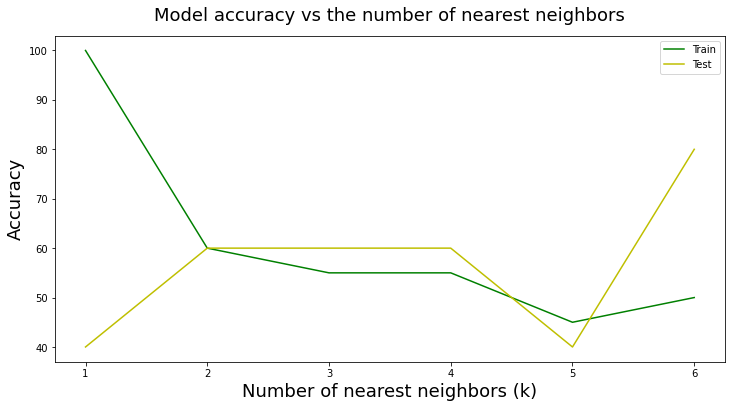

In [ ]:
# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(k_lst, acc_train_lst, color='g', label="Train")
plt.plot(k_lst, acc_test_lst, color='y', label="Test")
plt.xlabel('Number of nearest neighbors (k)', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.title('Model accuracy vs the number of nearest neighbors', fontsize=18, pad=15)
plt.legend()
plt.show()


In [ ]:
# compare the results
print("labels (test set)", lab_sorted[y_test.astype('int32')])
print("The prediction (k=4)", pred_test[3])


labels (test set) ['Apartment' 'House' 'House' 'Apartment' 'Apartment']
The prediction (k=4) ['Apartment' 'Apartment' 'Apartment' 'Apartment' 'Apartment']
